<a href="https://colab.research.google.com/github/FarahTatania/Study_Independent/blob/main/PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.617838,0.354377,0.089915,0.044858,0.320488,0.822197,0.412934,0.829197,0.064348,0.704638,A
1,0.545614,0.701670,0.638993,0.951234,0.991894,0.786391,0.484056,0.640910,0.807483,0.467158,B
2,0.276585,0.706117,0.553519,0.625099,0.913118,0.101945,0.502037,0.731108,0.786916,0.048884,A
3,0.538694,0.805196,0.973283,0.719102,0.901192,0.561298,0.165783,0.425549,0.323335,0.335246,B
4,0.563108,0.529469,0.543284,0.815885,0.574000,0.872572,0.794313,0.339671,0.875573,0.770698,A


In [2]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [3]:
y = df.loc[:,['label']].values

In [4]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.617838,0.354377,0.089915,0.044858,0.320488,0.822197,0.412934,0.829197,0.064348,0.704638
1,0.545614,0.701670,0.638993,0.951234,0.991894,0.786391,0.484056,0.640910,0.807483,0.467158
2,0.276585,0.706117,0.553519,0.625099,0.913118,0.101945,0.502037,0.731108,0.786916,0.048884
3,0.538694,0.805196,0.973283,0.719102,0.901192,0.561298,0.165783,0.425549,0.323335,0.335246
4,0.563108,0.529469,0.543284,0.815885,0.574000,0.872572,0.794313,0.339671,0.875573,0.770698


In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(x)

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.235489,0.088565
1,-0.026875,0.185555
2,-0.317814,-0.051623
3,0.102522,-0.012429
4,0.054630,-0.002981


In [9]:
df[['label']].head()

,label
0,A
1,B
2,A
3,B
4,A


In [10]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.235489,0.088565,A
1,-0.026875,0.185555,B
2,-0.317814,-0.051623,A
3,0.102522,-0.012429,B
4,0.054630,-0.002981,A


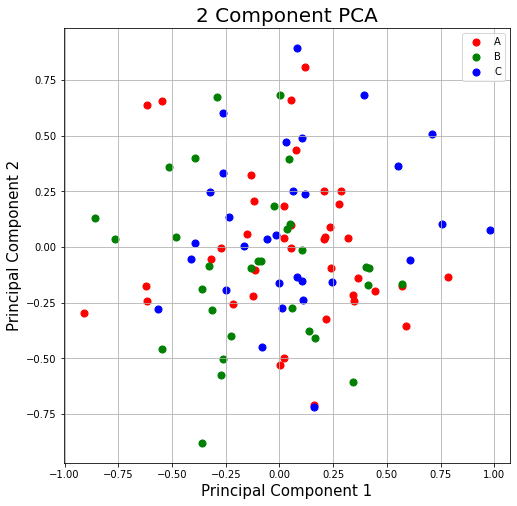

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()